# Prepare Data, Model, Agent

# imports and setup

In [1]:
# The following is needed in Jupyter labs for listing methods;

# use dot then tab after object
%config Completer.use_jedi = False

### use tensorboard

In [2]:
try:
    import tensorboard
except:
    import pip
    pip.main(['install', 'tensorboard'])
    import tensorboard

In [3]:
%load_ext tensorboard

In [4]:
import os
import time
import numpy as np
import pandas as pd
from pprint import pprint
%matplotlib inline
from pylab import plt, mpl
import pickle
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

import datetime as datetime
from datetime import date

from pathlib import Path


D:\DProgramFiles\Anaconda3\envs\KM-Trading\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\DProgramFiles\Anaconda3\envs\KM-Trading\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\DProgramFiles\Anaconda3\envs\KM-Trading\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import tensorflow as tf

In [7]:
# tf.__version__

In [8]:
# from tensorflow import keras
# from tensorflow.keras import layers

# Set up Features from columns

In [9]:
features =[
    'o',
     'h',
     'l',
     'c',
     'volume',
     'r',
     'sma',
     'min',
     'max',
     'mom',
     'std',
     'd',
     'o_lag_1',
     'o_lag_2',
     'o_lag_3',
     'o_lag_4',
     'o_lag_5',
     'h_lag_1',
     'h_lag_2',
     'h_lag_3',
     'h_lag_4',
     'h_lag_5',
     'l_lag_1',
     'l_lag_2',
     'l_lag_3',
     'l_lag_4',
     'l_lag_5',
     'c_lag_1',
     'c_lag_2',
     'c_lag_3',
     'c_lag_4',
     'c_lag_5',
     'volume_lag_1',
     'volume_lag_2',
     'volume_lag_3',
     'volume_lag_4',
     'volume_lag_5',
     'r_lag_1',
     'r_lag_2',
     'r_lag_3',
     'r_lag_4',
     'r_lag_5',
     'sma_lag_1',
     'sma_lag_2',
     'sma_lag_3',
     'sma_lag_4',
     'sma_lag_5',
     'min_lag_1',
     'min_lag_2',
     'min_lag_3',
     'min_lag_4',
     'min_lag_5',
     'max_lag_1',
     'max_lag_2',
     'max_lag_3',
     'max_lag_4',
     'max_lag_5',
     'mom_lag_1',
     'mom_lag_2',
     'mom_lag_3',
     'mom_lag_4',
     'mom_lag_5',
     'std_lag_1',
     'std_lag_2',
     'std_lag_3',
     'std_lag_4',
     'std_lag_5',

]

In [10]:
len(features)

67

# Set up learning, validation and testing datasets
based on dates

In [11]:
import datetime
import pytz

get saved features

In [12]:
len(features)

67

In [13]:
## set up Learning environment dates
startLearningDate =datetime.datetime(2021, 1, 1,0,0,0)
lastDayInData =datetime.datetime(2021, 12, 31,0,0,0)
lastDayInData = lastDayInData.combine(lastDayInData, lastDayInData.min.time())
# endLearningDate = startLearningDate + datetime.timedelta(days = 30)
endLearningDate = startLearningDate + datetime.timedelta(days = 10)

print('startLearningDate: ', startLearningDate)
print('endLearningDate: ', endLearningDate)
    
    
### set up validation environment dates
startValDate = endLearningDate + datetime.timedelta(1)
print('startValDate', startValDate)
# endValDate = startValDate + datetime.timedelta(10)
endValDate = startValDate + datetime.timedelta(1)

print('endValDate', endValDate)

### set up test environment dates
startTestDate = endValDate + datetime.timedelta(1)
print('startTestDate: ', startTestDate)
# endTestDate = startTestDate + datetime.timedelta(10)
endTestDate = startTestDate + datetime.timedelta(1)

print('endTestDate: ', endTestDate)

### set up environment start and end counts when using number index
# startLearningDate = 0
# startLearningDate = 0
# endLearningDate = int(data.shape[0] *.800000)
# etc.


startLearningDate:  2021-01-01 00:00:00
endLearningDate:  2021-01-11 00:00:00
startValDate 2021-01-12 00:00:00
endValDate 2021-01-13 00:00:00
startTestDate:  2021-01-14 00:00:00
endTestDate:  2021-01-15 00:00:00


In [14]:
symbol = 'USD_JPY'
window = 5
lags = 5
rows = 1
granularity = 'M1'
price = 'A'
leverage = 30
min_accuracy=0.10,
min_performance=0.85


In [15]:
try:
    import v20
except:
    import pip
    pip.main(['install', 'v20'])
    import V20

In [16]:
try:
    import tensorflow
except:
    import pip
    pip.main(['install', 'tensorflow'])
    import tensorflow

In [17]:

try:
    import pyvirtualdisplay
except:
    import pip
    pip.main(['install', 'pyvirtualdisplay'])
    import pyvirtualdisplay


In [18]:
import ModelBuilderEnv_66 as mbe

In [19]:
# from importlib import reload
# reload(mbe)
# import modelBuilderEnv as mbe

In [20]:
learn_env = mbe.ModelBuilderEnv_66(
    symbol=symbol,
    start = startLearningDate,
    end = endLearningDate,
    granularity= granularity,
    price= price,
    features=features,
    window=window,
    lags=lags,
    rows = rows,
    leverage=leverage,
    min_accuracy= min_accuracy,
    min_performance=min_performance,
)

HISTORICAL DATA WAS COLLECTED
Index(['o', 'h', 'l', 'c', 'volume', 'r', 'sma', 'min', 'max', 'mom', 'std'], dtype='object')
cols:  ['o', 'h', 'l', 'c', 'volume', 'r', 'sma', 'min', 'max', 'mom', 'std']


In [21]:
learn_env.observation_space.shape

(1,)

In [22]:
learn_env.n_features

67

In [23]:
len(learn_env.features)

67

In [24]:
learn_env.action_space.n

2

In [25]:
a = learn_env.action_space.sample()
a

0

In [26]:
# state, reward, done, info = learn_env.step(a)

In [27]:
learn_env.window

5

In [28]:
learn_env.raw['r'].min()

-0.09199999999999875

In [29]:
# learn_env.raw['r'].head()

In [30]:
# learn_env.raw['d'].head(30)

In [31]:
# learn_env.raw['r'].head(100)


In [32]:
np.bincount(learn_env.raw['d'])

array([3670, 3259], dtype=int64)

In [33]:
#                   start=f'{date} 13:00:00',
#                   end=f'{date} 14:00:00',
# the minimum accuracy and performance are set to zero
# since we are not training, but instead evaluating.

valid_env = mbe.ModelBuilderEnv_66(
    symbol=learn_env.symbol,
    start = startValDate,
    end = endValDate,
    granularity=learn_env.granularity,
    price=learn_env.price,
    features=learn_env.features,
    window=learn_env.window,
    lags=learn_env.lags,
    rows = learn_env.rows,
    leverage=learn_env.leverage,
    min_accuracy=0,
    min_performance=0,
    mu=learn_env.mu,
    std=learn_env.std
    )

HISTORICAL DATA WAS COLLECTED
Index(['o', 'h', 'l', 'c', 'volume', 'r', 'sma', 'min', 'max', 'mom', 'std'], dtype='object')
cols:  ['o', 'h', 'l', 'c', 'volume', 'r', 'sma', 'min', 'max', 'mom', 'std']


In [34]:
# valid_env.data.info()

In [35]:
#                   start=f'{date} 14:00:00',
#                   end=f'{date} 17:00:00',
#     start = f'{startTestDate} 08:00:00+00:00',
#     end = f'{endTestDate} 13:00:00+00:00',
test_env = mbe.ModelBuilderEnv_66(
    symbol=learn_env.symbol,
    start = startTestDate,
    end = endTestDate,
    granularity=learn_env.granularity,
    price=learn_env.price,
    features=learn_env.features,
    window=learn_env.window,
    lags=learn_env.lags,
    leverage=learn_env.leverage,
    rows = learn_env.rows,
    min_accuracy=0,
    min_performance=0,
    mu=learn_env.mu,
    std=learn_env.std
    )

HISTORICAL DATA WAS COLLECTED
Index(['o', 'h', 'l', 'c', 'volume', 'r', 'sma', 'min', 'max', 'mom', 'std'], dtype='object')
cols:  ['o', 'h', 'l', 'c', 'volume', 'r', 'sma', 'min', 'max', 'mom', 'std']


In [36]:
# test_env.data.info()

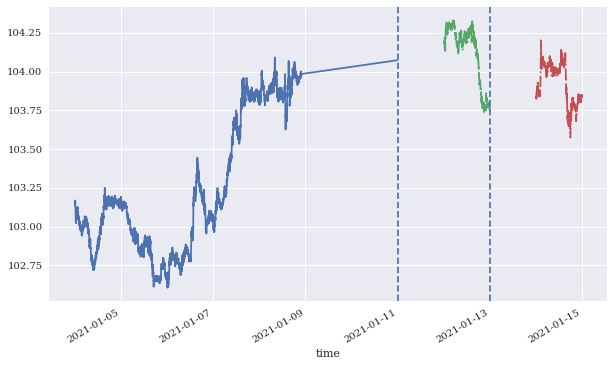

In [37]:
# plots the closing prices for learn env and testing data
ax = learn_env.raw['c'].plot(figsize=(10, 6))
plt.axvline(learn_env.raw.index[-1], ls='--')
valid_env.raw['c'].plot(ax=ax, style='-.')
plt.axvline(valid_env.raw.index[-1], ls='--')
test_env.raw['c'].plot(ax=ax, style='-.');

## TO DO: Does the closing prices show that prices almost always drop in the latter part of the week?

In [38]:
# import kmV20

# ***** START create the model

In [39]:
import tradingbot

In [40]:
from importlib import reload
reload(tradingbot)
import tradingbot as tradingbot

In [41]:
# import modelBuilderEnv as mbe

In [42]:
# from importlib import reload
# reload(mbe)
# import modelBuilderEnv as mbe

In [43]:
print(learn_env.action_space.n)

2


In [44]:
tradingbot.set_seeds(100)
agent = tradingbot.TradingBot(learn_env = learn_env, valid_env = valid_env)

w0  0.9440054495912807
w1  1.0630561521939246
self.classWeights:  {0: 0.9440054495912807, 1: 1.0630561521939246}
1- self.replayCounter:  0
Num GPUs: 1


In [45]:
# otb = OandaTradingBot('accountConfigs.cfg', agent, '1M',
#                       1500, verbose=False)

In [46]:
# episodes = 20
episodes = 50

In [47]:
# print(agent.arrayBalanceOfTrades)

In [48]:
print(sum(agent.trewards))

0


In [49]:
agent.classWeights

{0: 0.9440054495912807, 1: 1.0630561521939246}

In [50]:
%time agent.learn(episodes)

_____________________________________________
START EPISODE 1 of 50
episode start time:  Tuesday, March 22, 2022 04:41:12
END OF EPISODE 1 of 50
episode end time:  Tuesday, March 22, 2022 04:44:09
episode time duration:  0:02:57.372666
End 1/50 episodes at Tuesday, March 22, 2022 04:41:12 for a total of 0:02:57.372666 with the following balance of trades 30.20999999999802 
_____________________________________________
epmod:  1
episodes:  50
True
False
False
_____________________________________________
START EPISODE 2 of 50
episode start time:  Tuesday, March 22, 2022 04:44:12
END OF EPISODE 2 of 50
episode end time:  Tuesday, March 22, 2022 04:52:30
episode time duration:  0:08:17.952427
End 2/50 episodes at Tuesday, March 22, 2022 04:44:12 for a total of 0:08:17.952427 with the following balance of trades -61.80000000000305 
_____________________________________________
epmod:  2
episodes:  50
False
False
False
_____________________________________________
START EPISODE 3 of 50
epis

PermissionError: [Errno 13] Permission denied

In [51]:
# agent.trewards

In [52]:
# agent.arrayBalanceOfTrades

In [71]:
print(f'length of arrayBalanceOfTrades: {len(agent.arrayBalanceOfTrades)}')

length of arrayBalanceOfTrades: 184379


<function matplotlib.pyplot.show(close=None, block=None)>

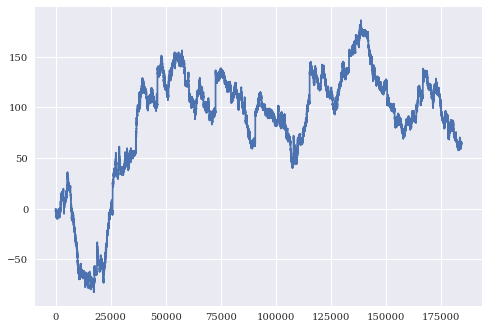

In [72]:
plt.plot(agent.arrayBalanceOfTrades)
plt.show

In [73]:
print('average of arrayBalanceOfTrades: ', sum(agent.arrayBalanceOfTrades)/len(agent.arrayBalanceOfTrades))

average of arrayBalanceOfTrades:  86.27592448160891


In [74]:
print('sum of arrayBalanceOfTrades: ', sum(agent.arrayBalanceOfTrades))

sum of arrayBalanceOfTrades:  15907468.67999457


In [75]:
# pl.cumsum()
print('sum: ', sum(agent.arrayBalanceOfTrades))


sum:  15907468.67999457


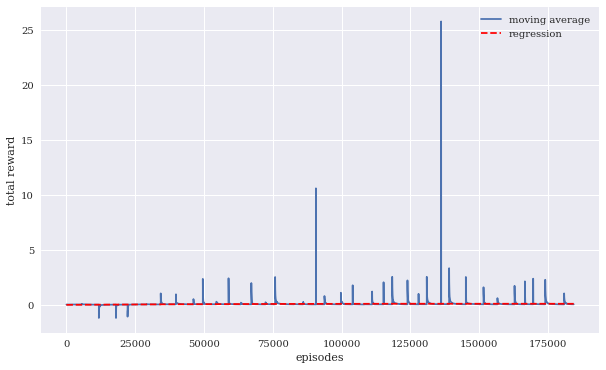

In [76]:
agent.plot_totalReward()

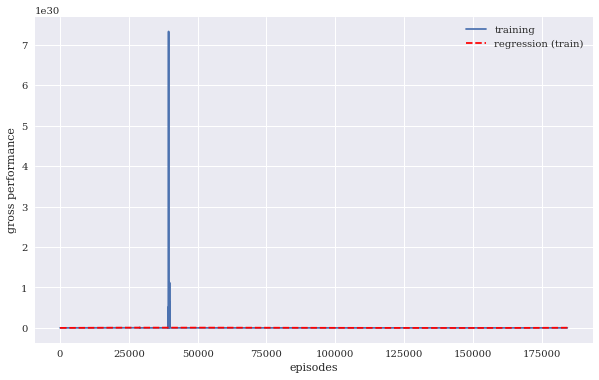

In [77]:
agent.a_plot_performance()

In [78]:
agent.arrayBalanceOfTrades

[0,
 -0.18000000000427008,
 -0.5100000000041405,
 -0.7200000000042905,
 -0.9000000000042974,
 -0.7200000000042905,
 -0.7500000000040075,
 -0.9300000000040143,
 -1.260000000004311,
 -1.3800000000044577,
 -1.5600000000044645,
 -1.8000000000043315,
 -1.710000000004328,
 -1.6200000000043246,
 -1.5600000000040382,
 -1.8300000000040484,
 -1.590000000003755,
 -1.3500000000034618,
 -1.590000000003755,
 -1.590000000003755,
 -1.7100000000034754,
 -1.7400000000036187,
 -1.8900000000034822,
 -2.040000000003346,
 -1.6800000000033322,
 -1.7700000000033356,
 -1.5900000000033288,
 -1.5600000000031855,
 -1.4100000000028956,
 -1.7700000000029092,
 -1.8000000000030525,
 -1.470000000003182,
 -1.2900000000031753,
 -1.6800000000029058,
 -1.8300000000027694,
 -1.950000000002916,
 -2.0700000000030627,
 -1.890000000003056,
 -2.2200000000029263,
 -2.0400000000029195,
 -2.4600000000032196,
 -2.5800000000033663,
 -2.9100000000032367,
 -3.2400000000035334,
 -3.09000000000367,
 -3.2700000000036766,
 -3.330000000003

In [61]:
# pklFile = '2021-01-01_2021-12-31_M1_A' + 'pkl'
# csvFile = '2021-01-01_2021-12-31_M1_A.csv'

In [62]:
# pathToCSV = Path('..').joinpath('OandaHistorical').joinpath('2021M1A_Raw').joinpath(csvFile)
# print(pathToCSV)

In [63]:
# dfCsv = pd.read_csv(pathToCSV)

In [64]:
# dfCsv.head()

In [65]:
# dfCsv.set_index('time', inplace = True)
# dfCsv.index = pd.to_datetime(dfCsv.index)
# dfCsv.index = dfCsv.index.tz_localize('GMT')
# dfCsv.head()

In [66]:
# dfCsv.drop('complete', 1, inplace = True)
# dfCsv.head()

In [67]:
# dfCsv.min()

In [68]:
# dfCsv.max()

In [69]:
# dfCsv.std()

In [2]:
!pip install schedule


In [4]:
def test():
    print('every 5 seconds')

In [5]:
schedule.every(4).second.do(test)

NameError: name 'schedule' is not defined